In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "cnn"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [2]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation="nearest")
    plt.axis("off")

In [3]:
import tensorflow as tf

In [6]:
from sklearn.datasets import load_sample_image

china = load_sample_image('china.jpg')
flower = load_sample_image('flower.jpg')

image = china[150:220, 130:250]

height, width, channels = image.shape

image_grayscale = image.mean(axis = 2).astype(np.float32)
images = image_grayscale.reshape(1, height, width, 1)

/Users/lipenghua/anaconda2/envs/ml/lib/python3.5/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/Users/lipenghua/anaconda2/envs/ml/lib/python3.5/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/Users/lipenghua/anaconda2/envs/ml/lib/python3.5/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/Users/lipenghua/anaconda2/envs/ml/lib/python3.5/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imre

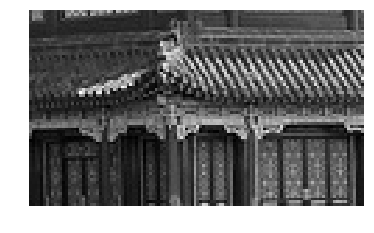

In [7]:
plot_image(images[0, :, :, 0])
plt.show()

In [19]:
fmap.shape

(7, 7, 1, 2)

In [13]:
fmap = np.zeros(shape=(7, 7, 1, 2), dtype=np.float32)
fmap[:, 3, 0, 0] = 1
fmap[3, :, 0, 1] = 1

In [15]:
reset_graph()

X = tf.placeholder(tf.float32, shape = (None, height, width, 1))
feature_maps = tf.constant(fmap)
convolution = tf.nn.conv2d(X, feature_maps, strides = [1, 1, 1, 1], padding = 'SAME')

In [17]:
with tf.Session() as sess:
    output = convolution.eval(feed_dict = {X: images})

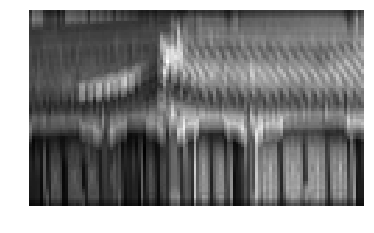

In [18]:
plot_image(output[0, :, :, 0])
plt.show()

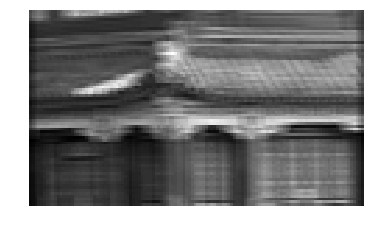

In [21]:
plot_image(output[0, :, :, 1])
plt.show()

/Users/lipenghua/anaconda2/envs/ml/lib/python3.5/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/Users/lipenghua/anaconda2/envs/ml/lib/python3.5/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/Users/lipenghua/anaconda2/envs/ml/lib/python3.5/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/Users/lipenghua/anaconda2/envs/ml/lib/python3.5/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imre

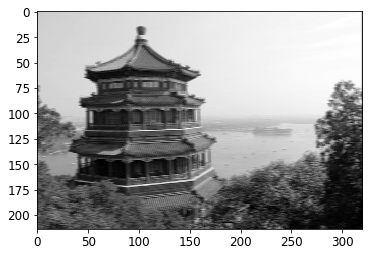

In [24]:
import numpy as np
from sklearn.datasets import load_sample_images

china = load_sample_image('china.jpg')
flower = load_sample_image('flower.jpg')

dataset = np.array([china, flower], dtype = np.float32)

batch_size, height, width, channels = dataset.shape

filters = np.zeros(shape = (7, 7, channels, 2), dtype = np.float32)
filters[:, 3, :, 0] = 1
filters[3, :, :, 1] = 1

X = tf.placeholder(tf.float32, shape = [None, height, width, channels])
convolution = tf.nn.conv2d(X, filters, strides = [1, 2, 2, 1], padding = 'SAME')

with tf.Session() as sess:
    output = sess.run(convolution, feed_dict = {X: dataset})
    
plt.imshow(output[0, :, :, 1], cmap = 'gray')
plt.show()

In [25]:
output.shape

(2, 214, 320, 2)

In [23]:
dataset.shape

(2, 427, 640, 3)

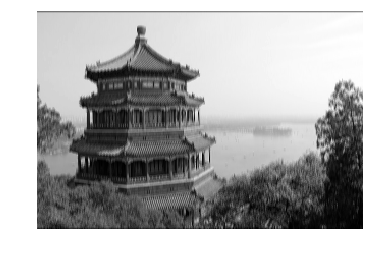

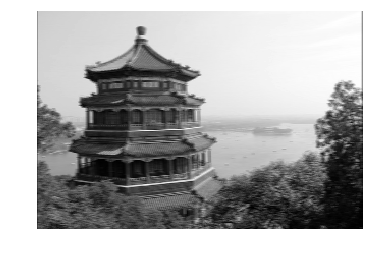

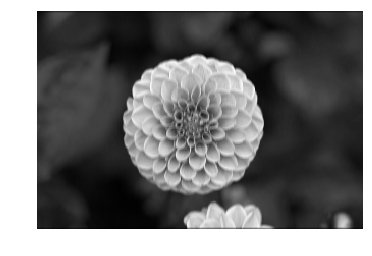

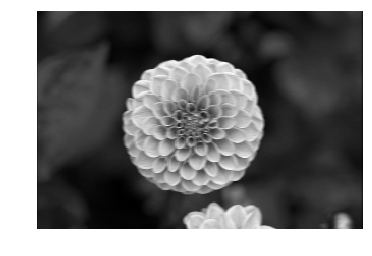

In [28]:
for image_index in (0, 1):
    for feature_map_index in (0, 1):
        plot_image(output[image_index, :, :, feature_map_index])
        plt.show()

In [36]:
reset_graph()
X = tf.placeholder(shape = (None, height, width, channels), dtype = tf.float32)
conv = tf.layers.conv2d(X, filters = 2, kernel_size = 7, strides = [2, 2], padding = 'SAME')

In [37]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    output = sess.run(conv, feed_dict = {X: dataset})

In [38]:
output.shape

(2, 214, 320, 2)

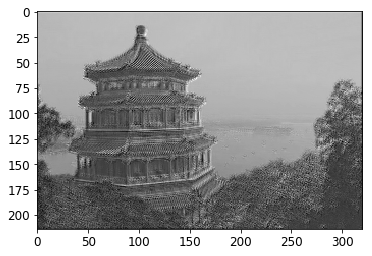

In [39]:
plt.imshow(output[0, :, :, 1], cmap = 'gray')
plt.show()

In [41]:
reset_graph()

filter_primes = np.array([2., 3., 5., 7., 11., 13.], dtype = np.float32)
x = tf.constant(np.arange(1, 13 + 1, dtype = np.float32).reshape([1, 1, 13, 1]))
filters = tf.constant(filter_primes.reshape(1, 6, 1, 1))

valid_conv = tf.nn.conv2d(x, filters, strides = [1, 1, 5, 1], padding = 'VALID')
same_conv = tf.nn.conv2d(x, filters, strides = [1, 1, 5, 1], padding = 'SAME')

with tf.Session() as sess:
    print('VALID:\n', valid_conv.eval())
    print('SAME:\n', same_conv.eval())

VALID:
 [[[[ 184.]
   [ 389.]]]]
SAME:
 [[[[ 143.]
   [ 348.]
   [ 204.]]]]


In [42]:
batch_size, height, width, channels = dataset.shape

filters = np.zeros(shape = (7, 7, channels, 2), dtype = np.float32)
filters[:, 3, :, 0] = 1
filters[3, :, :, 1] = 1

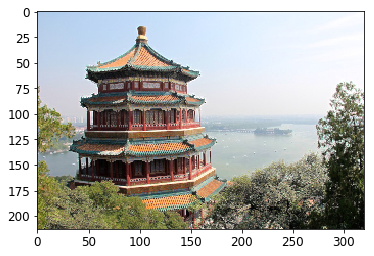

In [43]:
X = tf.placeholder(tf.float32, shape = (None, height, width, channels))
max_pool = tf.nn.max_pool(X, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'VALID')

with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict = {X: dataset})

plt.imshow(output[0].astype(np.uint8))
plt.show()

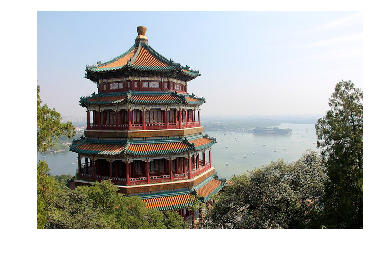

In [44]:
plot_color_image(dataset[0])
plt.show()

In [5]:
height = 28
width = 28
channels = 1
n_inputs = height * width

conv1_fmaps = 32
conv1_ksize = 3
conv1_stride = 1
conv1_pad = 'SAME'

conv2_fmaps = 64
conv2_ksize = 3
conv2_stride = 2
conv2_pad = 'SAME'

pool3_fmaps = conv2_fmaps

n_fc1 = 64
n_outputs = 10

reset_graph()

with tf.name_scope('inputs'):
    X = tf.placeholder(tf.float32, shape = [None, n_inputs], name = 'X')
    X_reshaped = tf.reshape(X, shape = [-1, height, width, channels])
    y = tf.placeholder(tf.int32, shape = [None], name = 'y')
    
conv1 = tf.layers.conv2d(X_reshaped, filters = conv1_fmaps, kernel_size = conv1_ksize, strides = conv1_stride, padding = conv1_pad, activation = tf.nn.relu, name = 'conv1')

conv2 = tf.layers.conv2d(conv1, filters = conv2_fmaps, kernel_size = conv2_ksize, strides = conv2_stride, padding = conv2_pad, activation = tf.nn.relu, name = 'conv2')

with tf.name_scope('pool3'):
    pool3 = tf.nn.max_pool(conv2, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'VALID')
    pool3_flat = tf.reshape(pool3, shape = [-1, pool3_fmaps * 7 * 7])

with tf.name_scope('fc1'):
    fc1 = tf.layers.dense(pool3_flat, n_fc1, activation = tf.nn.relu, name = 'fc1')

with tf.name_scope('output'):
    logits = tf.layers.dense(fc1, n_outputs, name = 'output')
    y_proba = tf.nn.softmax(logits, name = 'Y_proba')
    
with tf.name_scope('train'):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits = logits, labels = y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    training_op = optimizer.minimize(loss)
    
with tf.name_scope('eval'):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
with tf.name_scope('init'):
    init = tf.global_variables_initializer()

In [9]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [10]:
n_epochs = 10
batch_size = 100

with tf.Session() as sess:
    init.run()
    
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict = {X: X_batch, y: y_batch})
        
        acc_train = accuracy.eval(feed_dict = {X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict = {X: mnist.test.images, y: mnist.test.labels})
        
        print(epoch, 'train accuracy:', acc_train, 'test accuracy:', acc_test)

0 train accuracy: 0.98 test accuracy: 0.9747
1 train accuracy: 0.98 test accuracy: 0.9832
2 train accuracy: 0.99 test accuracy: 0.9842
3 train accuracy: 1.0 test accuracy: 0.9869
4 train accuracy: 1.0 test accuracy: 0.9878
5 train accuracy: 0.98 test accuracy: 0.9891
6 train accuracy: 1.0 test accuracy: 0.9886
7 train accuracy: 0.99 test accuracy: 0.9868
8 train accuracy: 1.0 test accuracy: 0.9864
9 train accuracy: 1.0 test accuracy: 0.9881


In [30]:
import tensorflow as tf

height = 28
widht = 28
channels = 1
n_inputs = height * width

conv1_fmaps = 32
conv1_ksize = 3
conv1_stride = 1
conv1_pad = 'SAME'

conv2_fmaps = 64
conv2_ksize = 3
conv2_stride = 1
conv2_pad = 'SAME'
conv2_dropout_rate = 0.25

pool3_fmaps = conv2_fmaps

n_fc1 = 128
fc1_dropout_rate = 0.5

n_outputs = 10

In [38]:
reset_graph()

In [39]:
with tf.name_scope('inputs'):
    X = tf.placeholder(tf.float32, shape = [None, n_inputs], name = 'X')
    X_reshaped = tf.reshape(X, shape = [-1, height, width, channels])
    y = tf.placeholder(tf.int32, shape = [None], name = 'y')
    training = tf.placeholder_with_default(False, shape = [], name = 'training')

conv1 = tf.layers.conv2d(X_reshaped, filters = conv1_fmaps, kernel_size = conv1_ksize,
                        strides = conv1_stride, padding = conv1_pad, activation = tf.nn.relu, name = 'conv1')

conv2 = tf.layers.conv2d(conv1, filters = conv2_fmaps, kernel_size = conv2_ksize,
                        strides = conv2_stride, padding = conv2_pad, activation = tf.nn.relu, name = 'conv2')

with tf.name_scope('pool3'):
    pool3 = tf.nn.max_pool(conv2, ksize = (1, 2, 2, 1), strides = [1, 2, 2, 1], padding = 'VALID')
    pool3_flat = tf.reshape(pool3, shape = [-1, pool3_fmaps * 14 * 14])
    pool3_flat_drop = tf.layers.dropout(pool3_flat, conv2_dropout_rate, training = training)
    
with tf.name_scope('fc1'):
    fc1 = tf.layers.dense(pool3_flat_drop, n_fc1, activation = tf.nn.relu, name = 'fc1')
    fc1_drop = tf.layers.dropout(fc1, fc1_dropout_rate, training = training)
    
with tf.name_scope('output'):
    logits = tf.layers.dense(fc1_drop, n_outputs, name = 'output')
    Y_proba = tf.nn.softmax(logits, name = 'Y_proba')
    
with tf.name_scope('train'):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits = logits, labels = y)
    loss = tf.reduce_mean(xentropy)
    
    optimizer = tf.train.AdamOptimizer()
    training_op = optimizer.minimize(loss)
    
with tf.name_scope('eval'):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
with tf.name_scope('init'):
    init = tf.global_variables_initializer()

In [40]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [41]:
def get_model_params():
    gvars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES)
    return {gvar.op.name: value for gvar, value in zip(gvars, tf.get_default_session().run(gvars))}

def restore_model_params(model_params):
    gvar_names = list(model_params.keys())
    assign_ops = {gvar_name: tf.get_default_graph().get_operation_by_name(gvar_name + "/Assign")
                  for gvar_name in gvar_names}
    init_values = {gvar_name: assign_op.inputs[1] for gvar_name, assign_op in assign_ops.items()}
    feed_dict = {init_values[gvar_name]: model_params[gvar_name] for gvar_name in gvar_names}
    tf.get_default_session().run(assign_ops, feed_dict=feed_dict)

In [42]:
n_epochs = 1000
batch_size = 50

best_loss_val = np.infty
check_interval = 500
checks_since_last_progress = 0
max_checks_without_progress = 20
best_model_params = None

with tf.Session() as sess:
    init.run()
    
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict = {X: X_batch, y: y_batch, training: True})
            if iteration % check_interval == 0:
                loss_val = loss.eval(feed_dict = {X: mnist.validation.images, y: mnist.validation.labels})
                
                if loss_val < best_loss_val:
                    best_loss_val = loss_val
                    check_since_last_progress = 0
                    best_model_params = get_model_params()
                else:
                    checks_since_last_progress += 1
                
        acc_train = accuracy.eval(feed_dict = {X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict = {X: mnist.validation.images, y: mnist.validation.labels})
        
        print("Epoch {}, train accuracy: {:.4f}%, valid. accuracy: {:.4f}%, valid. best loss: {:.6f}".format(
                  epoch, acc_train * 100, acc_val * 100, best_loss_val))
        if checks_since_last_progress > max_checks_without_progress:
            print("Early stopping!")
            break
            
    if best_model_params:
        restore_model_params(best_model_params)
        
    acc_test = accuracy.eval(feed_dict = {X: mnist.test.images, y: mnist.test.labels})
        
    print('final accuracy on test set:', acc_test)
                

Epoch 0, train accuracy: 98.0000%, valid. accuracy: 98.4800%, valid. best loss: 0.063742
Epoch 1, train accuracy: 100.0000%, valid. accuracy: 98.5800%, valid. best loss: 0.047037
Epoch 2, train accuracy: 98.0000%, valid. accuracy: 98.7600%, valid. best loss: 0.045568
Epoch 3, train accuracy: 98.0000%, valid. accuracy: 98.9200%, valid. best loss: 0.040814
Epoch 4, train accuracy: 100.0000%, valid. accuracy: 99.0000%, valid. best loss: 0.039427
Epoch 5, train accuracy: 100.0000%, valid. accuracy: 99.1000%, valid. best loss: 0.034811
Epoch 6, train accuracy: 100.0000%, valid. accuracy: 99.1800%, valid. best loss: 0.031494
Epoch 7, train accuracy: 100.0000%, valid. accuracy: 99.2000%, valid. best loss: 0.031446
Epoch 8, train accuracy: 100.0000%, valid. accuracy: 99.2600%, valid. best loss: 0.031446
Epoch 9, train accuracy: 100.0000%, valid. accuracy: 99.3000%, valid. best loss: 0.031111
Epoch 10, train accuracy: 100.0000%, valid. accuracy: 99.1000%, valid. best loss: 0.031111
Epoch 11, tr

In [43]:
width = 299
height = 299
channels = 3

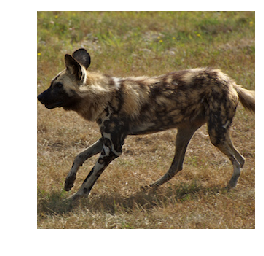

In [44]:
import matplotlib.image as mpimg

test_image = mpimg.imread(os.path.join("images","cnn","test_image.png"))[:, :, :channels]
plt.imshow(test_image)
plt.axis('off')
plt.show()

In [45]:
test_image = 2 * test_image - 1

In [52]:
import sys
import tarfile
from six.moves import urllib

TF_MODELS_URL = 'http://download.tensorflow.org/models'
INCEPTION_V3_URL = TF_MODELS_URL + '/inception_v3_2016_08_28.tar.gz'
INCEPTION_PATH = os.path.join('datasets', 'inception')
INCEPTION_V3_CHECKPOINT_PATH = os.path.join(INCEPTION_PATH, 'inception_v3.ckpt')

def download_progress(count, block_size, total_size):
    percent = count * block_size * 100 // total_size
    sys.stdout.write('\rDonwloading: {}%'.format(percent))
    sys.stdout.flush()
    
def fetch_pretrained_inception_v3(url=INCEPTION_V3_URL, path=INCEPTION_PATH):
    if os.path.exists(INCEPTION_V3_CHECKPOINT_PATH):
        return
    
    os.makedirs(path, exist_ok = True)
    tgz_path = os.path.join(path, 'inception_v3.tgz')
    urllib.request.urlretrieve(url, tgz_path, reporthook = download_progress)
    inception_tgz = tarfile.open(tgz_path)
    inception_tgz.extractall(path = path)
    inception_tgz.close()
    os.remove(tgz_path)

In [53]:
fetch_pretrained_inception_v3()

Donwloading: 100%

In [54]:
import re

CLASS_NAME_REGEX = re.compile(r"^n\d+\s+(.*)\s*$", re.M | re.U)

def load_class_names():
    with open(os.path.join("datasets", "inception", "imagenet_class_names.txt"), "rb") as f:
        content = f.read().decode('utf-8')
        return CLASS_NAME_REGEX.findall(content)

In [55]:
class_name = ['background'] + load_class_names()

In [56]:
class_name[:5]

['background',
 'tench, Tinca tinca',
 'goldfish, Carassius auratus',
 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 'tiger shark, Galeocerdo cuvieri']

In [57]:
from tensorflow.contrib.slim.nets import inception
import tensorflow.contrib.slim as slim

reset_graph()

X = tf.placeholder(tf.float32, shape = [None, 299, 299, 3], name = 'X')

with slim.arg_scope(inception.inception_v3_arg_scope()):
    logits, end_points = inception.inception_v3(X, num_classes = 1001, is_training = False)

predictions = end_points['Predictions']
saver = tf.train.Saver()

In [58]:
with tf.Session() as sess:
    saver.restore(sess, INCEPTION_V3_CHECKPOINT_PATH)

INFO:tensorflow:Restoring parameters from datasets/inception/inception_v3.ckpt


In [59]:
X_test = test_image.reshape(-1, height, width, channels)

with tf.Session() as sess:
    saver.restore(sess, INCEPTION_V3_CHECKPOINT_PATH)
    predictions_val = predictions.eval(feed_dict = {X: X_test})

INFO:tensorflow:Restoring parameters from datasets/inception/inception_v3.ckpt


In [60]:
most_likely_class_index = np.argmax(predictions_val[0])
most_likely_class_index

276

In [62]:
class_name[most_likely_class_index]

'African hunting dog, hyena dog, Cape hunting dog, Lycaon pictus'

In [63]:
top_5 = np.argpartition(predictions_val[0], -5)[-5:]
top_5 = reversed(top_5[np.argsort(predictions_val[0][top_5])])
for i in top_5:
    print('{0}: {1:.2f}%'.format(class_name[i], 100 * predictions_val[0][i]))

African hunting dog, hyena dog, Cape hunting dog, Lycaon pictus: 93.13%
hyena, hyaena: 2.57%
European fire salamander, Salamandra salamandra: 0.06%
bearskin, busby, shako: 0.05%
swimming trunks, bathing trunks: 0.05%


In [65]:
import sys
import tarfile
from six.moves import urllib

FLOWERS_URL = "http://download.tensorflow.org/example_images/flower_photos.tgz"
FLOWERS_PATH = os.path.join("datasets", "flowers")

def fetch_flowers(url=FLOWERS_URL, path=FLOWERS_PATH):
    if os.path.exists(FLOWERS_PATH):
        return
    os.makedirs(path, exist_ok=True)
    tgz_path = os.path.join(path, "flower_photos.tgz")
    urllib.request.urlretrieve(url, tgz_path, reporthook=download_progress)
    flowers_tgz = tarfile.open(tgz_path)
    flowers_tgz.extractall(path=path)
    flowers_tgz.close()
    os.remove(tgz_path)

In [66]:
fetch_flowers()

Donwloading: 100%

In [67]:
flowers_root_path = os.path.join(FLOWERS_PATH, "flower_photos")
flower_classes = sorted([dirname for dirname in os.listdir(flowers_root_path)
                  if os.path.isdir(os.path.join(flowers_root_path, dirname))])
flower_classes

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [70]:
from collections import defaultdict

image_paths = defaultdict(list)

for flower_class in flower_classes:
    image_dir = os.path.join(flowers_root_path, flower_class)
    for filepath in os.listdir(image_dir):
        if filepath.endswith('.jpg'):
            image_paths[flower_class].append(os.path.join(image_dir, filepath))

In [71]:
for paths in image_paths.values():
    paths.sort()

Class: daisy


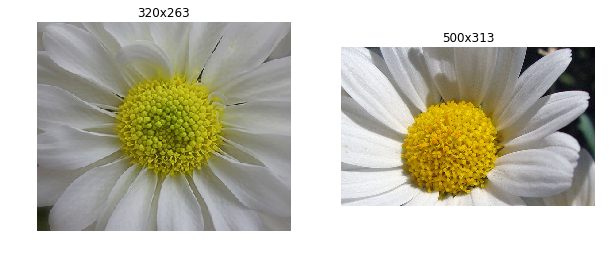

Class: dandelion


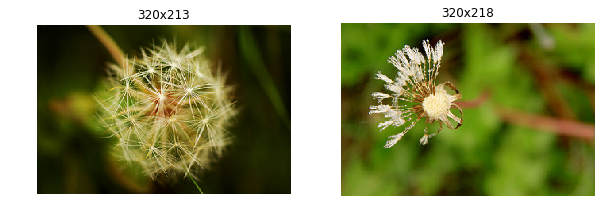

Class: roses


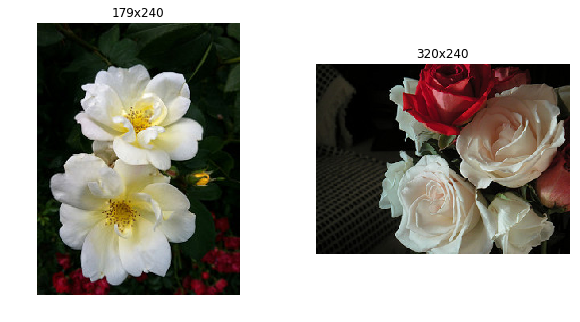

Class: sunflowers


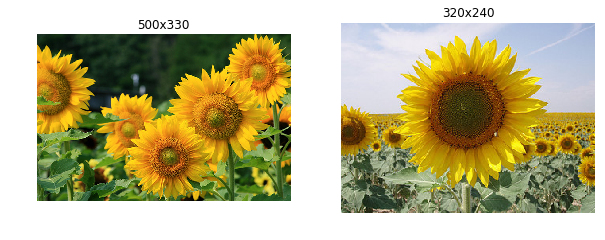

Class: tulips


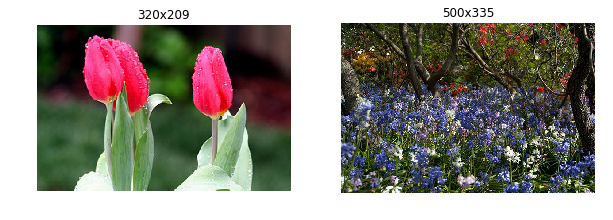

In [72]:
import matplotlib.image as mpimg

n_examples_per_class = 2

for flower_class in flower_classes:
    print('Class:', flower_class)
    plt.figure(figsize = (10, 5))
    for index, example_image_path in enumerate(image_paths[flower_class][:n_examples_per_class]):
        example_image = mpimg.imread(example_image_path)[:, :, :channels]
        plt.subplot(100 + n_examples_per_class * 10 + index + 1)
        plt.title("{}x{}".format(example_image.shape[1], example_image.shape[0]))
        plt.imshow(example_image)
        plt.axis("off")
    plt.show()

In [84]:
from scipy.misc import imresize

def prepare_image(image, target_width = 299, target_height = 299, max_zoom = 0.2):
    height = image.shape[0]
    width = image.shape[1]
    image_ratio = width / height
    
    target_image_ratio = target_width / target_height
    
    crop_vertically = image_ratio < target_image_ratio
    crop_width = width if crop_vertically else int(height * target_image_ratio)
    crop_height = int(width / target_image_ratio) if crop_vertically else height
    
    resize_factor = np.random.rand() * max_zoom + 1.0
    crop_width = int(crop_width / resize_factor)
    crop_height = int(crop_height / resize_factor)
    
    x0 = np.random.randint(0, width - crop_width)
    y0 = np.random.randint(0, height - crop_width)
    x1 = x0 + crop_width
    y1 = y0 + crop_height
    
    image = image[y0 : y1, x0 : x1]
    
    if np.random.rand() < 0.5:
        image = np.fliplr(image)
        
    image = imresize(image, (target_width, target_height))
    
    return image.astype(np.float32) / 255

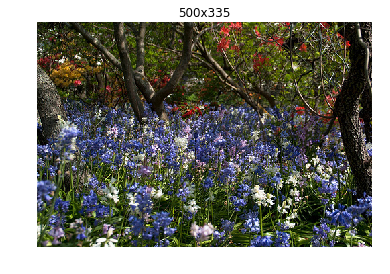

In [85]:
plt.figure(figsize=(6, 8))
plt.imshow(example_image)
plt.title("{}x{}".format(example_image.shape[1], example_image.shape[0]))
plt.axis("off")
plt.show()

/Users/lipenghua/anaconda2/envs/ml/lib/python3.5/site-packages/ipykernel_launcher.py:28: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


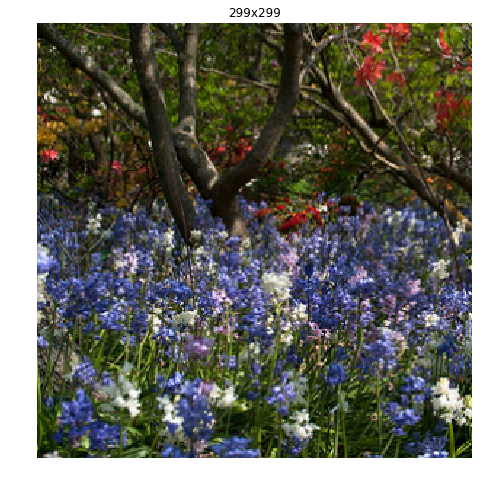

In [86]:
prepared_image = prepare_image(example_image)

plt.figure(figsize=(8, 8))
plt.imshow(prepared_image)
plt.title("{}x{}".format(prepared_image.shape[1], prepared_image.shape[0]))
plt.axis("off")
plt.show()

/Users/lipenghua/anaconda2/envs/ml/lib/python3.5/site-packages/ipykernel_launcher.py:28: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


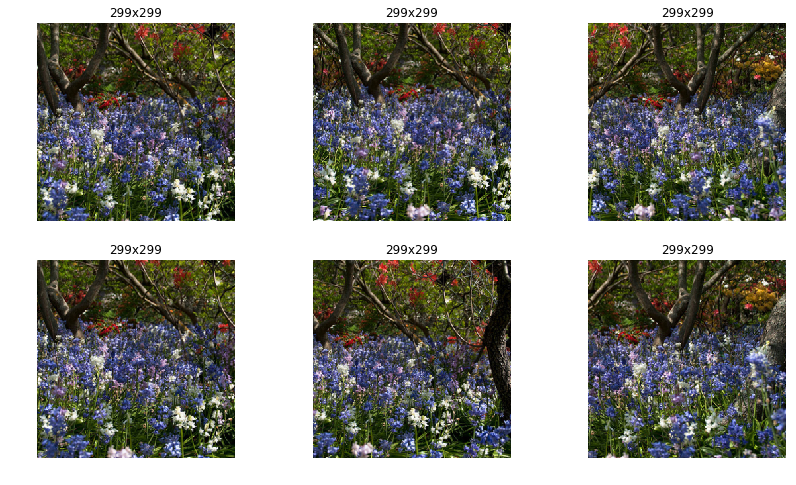

In [87]:
rows, cols = 2, 3

plt.figure(figsize = (14, 8))

for row in range(rows):
    for col in range(cols):
        prepared_image = prepare_image(example_image)
        plt.subplot(rows, cols, row * cols + col + 1)
        plt.title("{}x{}".format(prepared_image.shape[1], prepared_image.shape[0]))
        plt.imshow(prepared_image)
        plt.axis("off")
plt.show()

In [90]:
def prepare_image_with_tensorflow(image, target_width = 299, target_height = 299, max_zoom = 0.2):
    image_shape = tf.cast(tf.shape(image), tf.float32)
    
    height = image_shape[0]
    width = image_shape[1]
    image_ratio = width / height
    
    target_image_ratio = target_width / target_height
    
    crop_vertically = image_ratio < target_image_ratio
    
    crop_width = tf.cond(crop_vertically, lambda: width, lambda: height * target_image_ratio)
    crop_height = tf.cond(crop_vertically, lambda: width / target_image_ratio, lambda: height)
    
    resize_factor = tf.random_uniform(shape = [], minval = 1.0, maxval = 1.0 + max_zoom)
    crop_width = tf.cast(crop_width / resize_factor, tf.int32)
    crop_height = tf.cast(crop_height / resize_factor, tf.int32)
    box_size = tf.stack([crop_height, crop_width, 3])
    
    image = tf.random_crop(image, box_size)
    
    image = tf.image.random_flip_left_right(image)
    
    image_batch = tf.expand_dims(image, 0)
    
    image_batch = tf.image.resize_bilinear(image_batch, [target_height, target_width])
    image = image_batch[0] / 255
    
    return image

scope: random_flip_left_right/
result name: random_flip_left_right/Merge:0


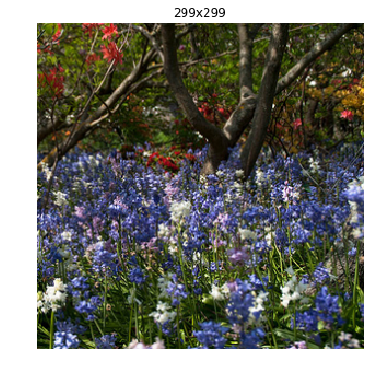

In [91]:
reset_graph()

input_image = tf.placeholder(tf.uint8, shape=[None, None, 3])
prepared_image_op = prepare_image_with_tensorflow(input_image)

with tf.Session():
    prepared_image = prepared_image_op.eval(feed_dict={input_image: example_image})
    
plt.figure(figsize=(6, 6))
plt.imshow(prepared_image)
plt.title("{}x{}".format(prepared_image.shape[1], prepared_image.shape[0]))
plt.axis("off")
plt.show()

In [92]:
from tensorflow.contrib.slim.nets import inception
import tensorflow.contrib.slim

reset_graph()

X = tf.placeholder(tf.float32, shape = [None, height, width, channels], name = 'X')
training = tf.placeholder_with_default(False, shape = [])

with slim.arg_scope(inception.inception_v3_arg_scope()):
    logits, end_points = inception.inception_v3(X, num_classes = 1001, is_training = training)

inception_saver = tf.train.Saver()

In [93]:
logits.op.inputs[0]

<tf.Tensor 'InceptionV3/Logits/Conv2d_1c_1x1/BiasAdd:0' shape=(?, 1, 1, 1001) dtype=float32>

In [94]:
logits.op.inputs[0].op.inputs[0]

<tf.Tensor 'InceptionV3/Logits/Conv2d_1c_1x1/Conv2D:0' shape=(?, 1, 1, 1001) dtype=float32>

In [95]:
logits.op.inputs[0].op.inputs[0].op.inputs[0]

<tf.Tensor 'InceptionV3/Logits/Dropout_1b/cond/Merge:0' shape=(?, 1, 1, 2048) dtype=float32>

In [96]:
end_points

{'AuxLogits': <tf.Tensor 'InceptionV3/AuxLogits/SpatialSqueeze:0' shape=(?, 1001) dtype=float32>,
 'Conv2d_1a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_1a_3x3/Relu:0' shape=(?, 149, 149, 32) dtype=float32>,
 'Conv2d_2a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_2a_3x3/Relu:0' shape=(?, 147, 147, 32) dtype=float32>,
 'Conv2d_2b_3x3': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_2b_3x3/Relu:0' shape=(?, 147, 147, 64) dtype=float32>,
 'Conv2d_3b_1x1': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_3b_1x1/Relu:0' shape=(?, 73, 73, 80) dtype=float32>,
 'Conv2d_4a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_4a_3x3/Relu:0' shape=(?, 71, 71, 192) dtype=float32>,
 'Logits': <tf.Tensor 'InceptionV3/Logits/SpatialSqueeze:0' shape=(?, 1001) dtype=float32>,
 'MaxPool_3a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/MaxPool_3a_3x3/MaxPool:0' shape=(?, 73, 73, 64) dtype=float32>,
 'MaxPool_5a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/MaxPool_5a_3x3/MaxPool:0' shape=(?, 35, 35, 192) dtype=floa

In [97]:
end_points["PreLogits"]

<tf.Tensor 'InceptionV3/Logits/Dropout_1b/cond/Merge:0' shape=(?, 1, 1, 2048) dtype=float32>

In [99]:
prelogits = tf.squeeze(end_points['PreLogits'], axis = [1, 2])

In [100]:
n_outputs = len(flower_classes)

with tf.name_scope('new_output_layer'):
    flower_logits = tf.layers.dense(prelogits, n_outputs, name = 'flower_logits')
    Y_proba = tf.nn.softmax(flower_logits, name = 'Y_proba')

In [102]:
y = tf.placeholder(tf.int32, shape = [None])

with tf.name_scope('train'):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits = flower_logits, labels = y)
    loss = tf.reduce_mean(xentropy)
    
    optimizer = tf.train.AdamOptimizer()
    flower_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope = 'flower_logits')
    training_op = optimizer.minimize(loss, var_list = flower_vars)
    
with tf.name_scope('eval'):
    correct = tf.nn.in_top_k(flower_logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
with tf.name_scope('init_and_save'):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()

In [103]:
[v.name for v in flower_vars]

['flower_logits/kernel:0', 'flower_logits/bias:0']

In [105]:
flower_class_ids = {flower_class: index for index, flower_class in enumerate(flower_classes)}
flower_class_ids

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [106]:
flower_paths_and_classes = []
for flower_class, paths in image_paths.items():
    for path in paths:
        flower_paths_and_classes.append((path, flower_class_ids[flower_class]))

In [117]:
test_ratio = 0.2
train_size = int(len(flower_paths_and_classes) * (1 - test_ratio))

np.random.shuffle(flower_paths_and_classes)

flower_paths_and_classes_train = flower_paths_and_classes[:train_size]
flower_paths_and_classes_test = flower_paths_and_classes[train_size:]

In [108]:
flower_paths_and_classes_train[:3]

[('datasets/flowers/flower_photos/daisy/19834392829_7d697871f6.jpg', 0),
 ('datasets/flowers/flower_photos/roses/3872230296_6c477309f3_n.jpg', 2),
 ('datasets/flowers/flower_photos/sunflowers/6627521877_6e43fb3c49_m.jpg', 3)]

In [110]:
from random import sample

def prepare_batch(flower_paths_and_classes, batch_size):
    batch_paths_and_classes = sample(flower_paths_and_classes, batch_size)
    images = [mpimg.imread(path)[:, :, :channels] for path, labels in batch_paths_and_classes]
    prepare_images = [prepare_image(image) for image in images]
    X_batch = 2 * np.stack(prepare_images) - 1
    y_batch = np.array([labels for path, labels in batch_paths_and_classes], dtype = np.int32)
    
    return X_batch, y_batch

In [111]:
X_batch, y_batch = prepare_batch(flower_paths_and_classes_train, batch_size=4)

/Users/lipenghua/anaconda2/envs/ml/lib/python3.5/site-packages/ipykernel_launcher.py:28: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


In [112]:
X_batch.shape

(4, 299, 299, 3)

In [113]:
X_batch.dtype

dtype('float32')

In [114]:
y_batch.shape

(4,)

In [115]:
y_batch.dtype

dtype('int32')

In [118]:
X_test, y_test = prepare_batch(flower_paths_and_classes_test, batch_size=len(flower_paths_and_classes_test))

/Users/lipenghua/anaconda2/envs/ml/lib/python3.5/site-packages/ipykernel_launcher.py:28: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


In [119]:
X_test.shape

(734, 299, 299, 3)

In [121]:
n_epochs = 10
batch_size = 40
n_iterations_per_epoch = len(flower_paths_and_classes_train) // batch_size

with tf.Session() as sess:
    init.run()
    inception_saver.restore(sess, INCEPTION_V3_CHECKPOINT_PATH)
    
    for epoch in range(n_epochs):
        print('epoch', epoch, end = '')
        for iteration in range(n_iterations_per_epoch):
            print('.', end = '')
            X_batch, y_batch = prepare_batch(flower_paths_and_classes_train, batch_size)
            sess.run(training_op, feed_dict = {X: X_batch, y: y_batch, training: True})
            
        acc_train = accuracy.eval(feed_dict = {X: X_batch, y: y_batch})
        print('   Train accuracy:', acc_train)
        
        save_path = saver.save(sess, './my_flowers_model')

INFO:tensorflow:Restoring parameters from datasets/inception/inception_v3.ckpt
epoch 0.

/Users/lipenghua/anaconda2/envs/ml/lib/python3.5/site-packages/ipykernel_launcher.py:28: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


........................................................................   Train accuracy: 0.575
epoch 1.........................................................................   Train accuracy: 0.6
epoch 2.........................................................................   Train accuracy: 0.575
epoch 3.........................................................................   Train accuracy: 0.75
epoch 4.........................................................................   Train accuracy: 0.7
epoch 5.........................................................................   Train accuracy: 0.625
epoch 6.........................................................................   Train accuracy: 0.7
epoch 7.........................................................................   Train accuracy: 0.625
epoch 8.........................................................................   Train accuracy: 0.6
epoch 9.................................................................

KeyboardInterrupt: 